/home/walrusbane/libs/lib/python3.10/site-packages/neurokit2/signal/signal_distort.py:315: NeuroKitWarning: Skipping requested noise frequency  of 0.1 Hz since its period of 10.0  seconds exceeds the signal duration of 5.0 seconds.  Please choose noise frequencies larger than  0.2 Hz or increase the duration of the  signal above 10.0 seconds.
  warn(


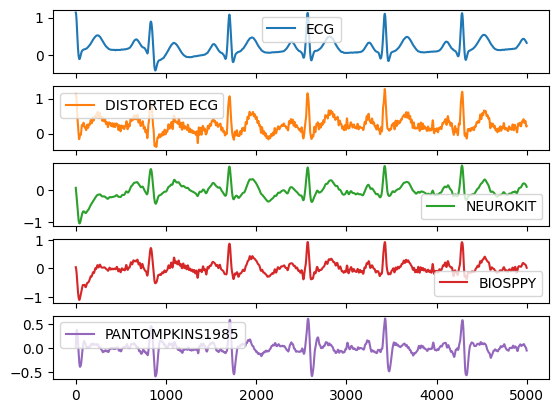

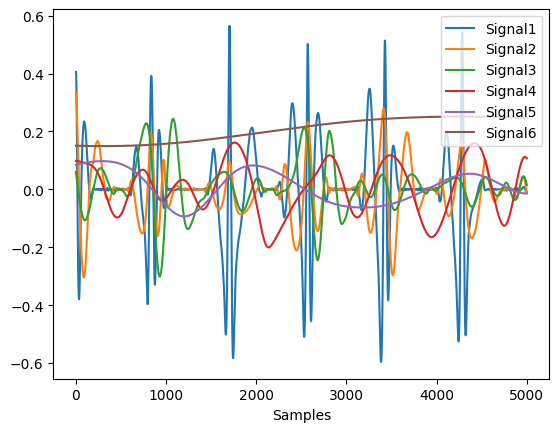

In [15]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import pycatch22

ecg = nk.ecg_simulate(duration=5, heart_rate=70)

distorted_ecg = nk.signal_distort(ecg, noise_frequency=[0.1, 2, 10, 100], noise_amplitude=0.2, powerline_amplitude=0.2)
neurokit_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='neurokit')
biosppy_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='biosppy')
pantompkins1985_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='pantompkins1985')

data = pd.DataFrame({"ECG": ecg,
                     "DISTORTED ECG": distorted_ecg,
                     "NEUROKIT": neurokit_cleaned_ecg,
                     "BIOSPPY": biosppy_cleaned_ecg,
                     "PANTOMPKINS1985": pantompkins1985_cleaned_ecg})

data.plot(subplots=True)

components = nk.signal_decompose(ecg, method='emd')
nk.signal_plot(components)
